# Imports

In [1]:
import sklearn
import pandas as pd
import numpy as np
import re

# Reading Data

In [2]:
df_17 = pd.read_csv('./Dataset/FIFA17_official_data.csv')
df_18 = pd.read_csv('./Dataset/FIFA18_official_data.csv')
df_19 = pd.read_csv('./Dataset/FIFA19_official_data.csv')
df_20 = pd.read_csv('./Dataset/FIFA20_official_data.csv')
df_21 = pd.read_csv('./Dataset/FIFA21_official_data.csv')
df_22 = pd.read_csv('./Dataset/FIFA22_official_data.csv')
datalist = [df_17,df_18,df_19,df_20,df_21,df_22]

In [3]:
df_22.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating', 'Release Clause',
       'DefensiveAwareness'],
      dtype='object')

# Cleaning Data

In [4]:
curr_set = df_17
for next_set in datalist[1:]:
    print(set(next_set) - set(curr_set))
    curr_set = next_set

for dataset in datalist:
    if 'Release Clause' in list(dataset.columns):
        dataset.drop("Release Clause", axis = 1, inplace = True)
    if 'DefensiveAwareness' in list(dataset.columns):
        dataset.drop("DefensiveAwareness", axis = 1, inplace = True)
print("--------------------")
curr_set = df_17
# for next_set in datalist[1:]:
#     print(set(next_set) - set(curr_set))
#     curr_set = next_set

{'Release Clause'}
set()
{'DefensiveAwareness'}
set()
set()
--------------------


In [5]:
#Now we can join the datasets
F_all_df = pd.concat(datalist, ignore_index=True)
F_all_df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating'],
      dtype='object')

In [6]:
# Drop unimportant columns
Unimportant_features  = ["Photo", "Flag", "Club Logo", "Wage", "Special", "International Reputation", "Work Rate", "Body Type", "Real Face", "Jersey Number", "Contract Valid Until", "Best Overall Rating","Joined","Loaned From"]
F_all_df.drop(Unimportant_features, axis = 1, inplace = True)
F_all_df["Ovr_pot"] = (F_all_df["Overall"] + F_all_df["Potential"])/2

In [7]:
# One-hot encode Preferred_foot
F_all_df = pd.get_dummies(F_all_df, columns = ["Preferred Foot"])
F_all_df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Weak Foot,Skill Moves,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Ovr_pot,Preferred Foot_Left,Preferred Foot_Right
0,176580,L. Suárez,29,Uruguay,92,92,FC Barcelona,€83M,4.0,4.0,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,92.0,0,1
1,178518,R. Nainggolan,28,Belgium,86,86,Roma,€37.5M,3.0,3.0,...,88.0,11.0,11.0,14.0,8.0,11.0,CDM,86.0,0,1
2,181872,A. Vidal,29,Chile,87,87,FC Bayern München,€41.5M,4.0,3.0,...,84.0,4.0,2.0,4.0,2.0,4.0,CDM,87.0,0,1
3,197445,D. Alaba,24,Austria,86,89,FC Bayern München,€41.5M,4.0,3.0,...,83.0,5.0,7.0,14.0,15.0,9.0,LB,87.5,1,0
4,195864,P. Pogba,23,France,88,94,Manchester United,€71.5M,4.0,5.0,...,73.0,5.0,6.0,2.0,4.0,3.0,CAM,91.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104347,240558,18 L. Clayton,17,England,53,70,Cheltenham Town,€100K,2.0,1.0,...,12.0,55.0,54.0,52.0,50.0,59.0,GK,61.5,0,1
104348,262846,�. Dobre,20,Romania,53,63,FC Academica Clinceni,€180K,2.0,1.0,...,12.0,57.0,52.0,53.0,48.0,58.0,GK,58.0,0,1
104349,241317,21 Xue Qinghao,19,China PR,47,60,Shanghai Shenhua FC,€100K,2.0,1.0,...,9.0,49.0,48.0,45.0,38.0,52.0,GK,53.5,0,1
104350,259646,A. Shaikh,18,India,47,67,ATK Mohun Bagan FC,€110K,3.0,1.0,...,13.0,49.0,41.0,39.0,45.0,49.0,GK,57.0,0,1


In [8]:
# Numerical columns
detailed_features = ['Age','Overall', 'Potential', 'Weak Foot', 'Skill Moves', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', "Ovr_pot", 'Preferred Foot_Left', 'Preferred Foot_Right']

In [9]:
# replace nan values
F_all_df[detailed_features] = F_all_df[detailed_features].fillna(0)
F_all_df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Weak Foot,Skill Moves,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Ovr_pot,Preferred Foot_Left,Preferred Foot_Right
0,176580,L. Suárez,29,Uruguay,92,92,FC Barcelona,€83M,4.0,4.0,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,92.0,0,1
1,178518,R. Nainggolan,28,Belgium,86,86,Roma,€37.5M,3.0,3.0,...,88.0,11.0,11.0,14.0,8.0,11.0,CDM,86.0,0,1
2,181872,A. Vidal,29,Chile,87,87,FC Bayern München,€41.5M,4.0,3.0,...,84.0,4.0,2.0,4.0,2.0,4.0,CDM,87.0,0,1
3,197445,D. Alaba,24,Austria,86,89,FC Bayern München,€41.5M,4.0,3.0,...,83.0,5.0,7.0,14.0,15.0,9.0,LB,87.5,1,0
4,195864,P. Pogba,23,France,88,94,Manchester United,€71.5M,4.0,5.0,...,73.0,5.0,6.0,2.0,4.0,3.0,CAM,91.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104347,240558,18 L. Clayton,17,England,53,70,Cheltenham Town,€100K,2.0,1.0,...,12.0,55.0,54.0,52.0,50.0,59.0,GK,61.5,0,1
104348,262846,�. Dobre,20,Romania,53,63,FC Academica Clinceni,€180K,2.0,1.0,...,12.0,57.0,52.0,53.0,48.0,58.0,GK,58.0,0,1
104349,241317,21 Xue Qinghao,19,China PR,47,60,Shanghai Shenhua FC,€100K,2.0,1.0,...,9.0,49.0,48.0,45.0,38.0,52.0,GK,53.5,0,1
104350,259646,A. Shaikh,18,India,47,67,ATK Mohun Bagan FC,€110K,3.0,1.0,...,13.0,49.0,41.0,39.0,45.0,49.0,GK,57.0,0,1


In [10]:
# Clean height column
feet_inches_re = re.compile(r"(\d)'(\d+)")

# Define a function to convert feet'inches to cm
def feet_inches_to_cm(s):
    match = feet_inches_re.match(s)
    if match:
        feet = int(match.group(1))
        inches = int(match.group(2))
        return round((feet*12 + inches) * 2.54, 2)
    else:
        return float(s.replace('cm', ''))
F_all_df['Height'] = pd.to_numeric(F_all_df['Height'].apply(feet_inches_to_cm))

In [11]:
F_all_df['Height'].value_counts()

182.88    13593
177.80    12221
175.26    10661
180.34    10380
187.96     9448
          ...  
159.00        3
156.00        2
155.00        1
157.00        1
206.00        1
Name: Height, Length: 71, dtype: int64

In [12]:
# Clean Weight Column
def convert_weight(weight_str):
    if 'kg' in weight_str:
        # If weight is in kg, remove the 'kg' suffix and return as float
        return float(weight_str.replace('kg', ''))
    elif 'lbs' in weight_str:
        # If weight is in lbs, convert to kg and return as float
        return float(weight_str.replace('lbs', '')) * 0.453592
    else:
        print("oops")
        # Return NaN if weight format is not recognized
        return pd.np.nan

# Apply the function to the Weight column
F_all_df['Weight'] = F_all_df['Weight'].apply(convert_weight)

In [13]:
F_all_df['Weight'].value_counts()

69.853168     7042
74.842680     6815
79.832192     4958
72.121128     4800
78.017824     4717
              ... 
104.000000       1
51.000000        1
53.000000        1
48.080752        1
105.000000       1
Name: Weight, Length: 117, dtype: int64

In [14]:
# Define a function to convert cost to millions
def convert_cost(cost_str):
    if 'M' in cost_str:
        # If cost is in millions, remove the '$' and 'M' suffix and return as float
        return float(cost_str.replace('€', '').replace('M', ''))
    elif 'K' in cost_str:
        # If cost is in thousands, remove the '$' and 'K' suffix, divide by 1000, and return as float
        return float(cost_str.replace('€', '').replace('K', '')) / 1000


# Apply the function to the Cost column
F_all_df['Value'] = F_all_df['Value'].apply(convert_cost)


In [15]:
# Create a normalised version
from sklearn.preprocessing import StandardScaler
scaler = sklearn.preprocessing.StandardScaler()
F_norm_df = F_all_df.copy(deep = True)
F_norm_df[detailed_features] = scaler.fit_transform(F_norm_df[detailed_features].to_numpy())
F_norm_df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Weak Foot', 'Skill Moves', 'Position', 'Height', 'Weight',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Ovr_pot', 'Preferred Foot_Left',
       'Preferred Foot_Right'],
      dtype='object')

In [16]:
df_22 = F_all_df.tail(df_22.shape[0])

In [17]:
df_22

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Weak Foot,Skill Moves,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Ovr_pot,Preferred Foot_Left,Preferred Foot_Right
87642,212198,Bruno Fernandes,26,Portugal,88,89,Manchester United,107.50,3.0,4.0,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.5,0,1
87643,209658,L. Goretzka,26,Germany,87,88,FC Bayern München,93.00,4.0,3.0,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.5,0,1
87644,176580,L. Suárez,34,Uruguay,88,88,Atlético de Madrid,44.50,4.0,3.0,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,0,1
87645,192985,K. De Bruyne,30,Belgium,91,91,Manchester City,125.50,5.0,4.0,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,0,1
87646,224334,M. Acuña,29,Argentina,84,84,Sevilla FC,37.00,3.0,4.0,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104347,240558,18 L. Clayton,17,England,53,70,Cheltenham Town,0.10,2.0,1.0,...,12.0,55.0,54.0,52.0,50.0,59.0,GK,61.5,0,1
104348,262846,�. Dobre,20,Romania,53,63,FC Academica Clinceni,0.18,2.0,1.0,...,12.0,57.0,52.0,53.0,48.0,58.0,GK,58.0,0,1
104349,241317,21 Xue Qinghao,19,China PR,47,60,Shanghai Shenhua FC,0.10,2.0,1.0,...,9.0,49.0,48.0,45.0,38.0,52.0,GK,53.5,0,1
104350,259646,A. Shaikh,18,India,47,67,ATK Mohun Bagan FC,0.11,3.0,1.0,...,13.0,49.0,41.0,39.0,45.0,49.0,GK,57.0,0,1


In [18]:
F_norm_df["Best Position"].value_counts()

CB     20687
ST     15332
CAM    12517
GK     10890
RM      8359
CDM     7824
CM      6018
RB      5116
LB      4840
LM      4711
RW      2656
RWB     1861
LWB     1779
LW      1279
CF       480
LF         2
SW         1
Name: Best Position, dtype: int64

## Validation

/var/folders/sq/1c_479xx58d7g62wy3fqmnl80000gn/T/ipykernel_56498/2469189298.py:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

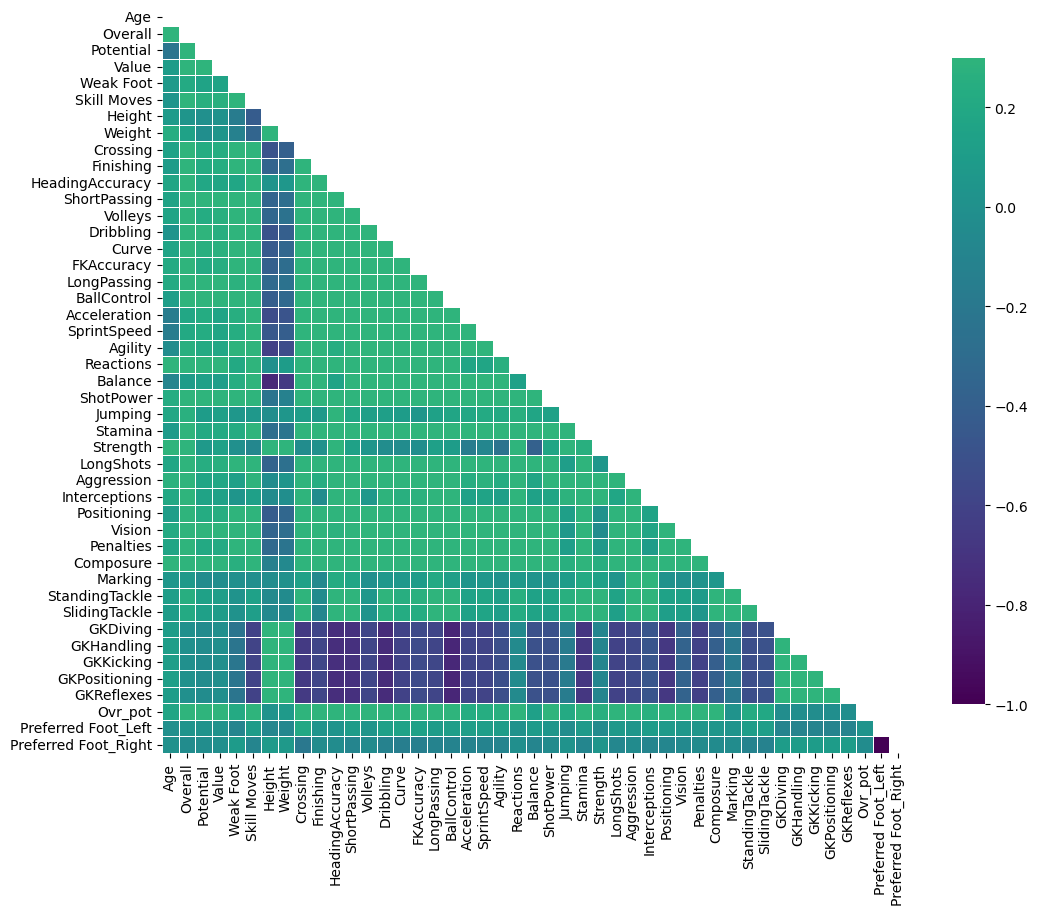

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sample = F_all_df.select_dtypes(include='number')
sample.drop(["ID"],axis = 1, inplace = True)
plt.figure(figsize=(12,12))

# Compute the correlation matrix
corr = sample.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="viridis", vmax=.3, center=0,square=True, linewidths=.7, cbar_kws={"shrink": .7})

# Essential Features Per Position

## Strikers

In [20]:
striker_df = F_norm_df[(F_norm_df["Best Position"] == "ST") | (F_norm_df["Best Position"] == "CF") | (F_norm_df["Best Position"] == "LF")]
striker_df  =  striker_df.reset_index(drop = True)
striker_df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Weak Foot,Skill Moves,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Ovr_pot,Preferred Foot_Left,Preferred Foot_Right
0,176580,L. Suárez,0.873366,Uruguay,3.647373,3.353318,FC Barcelona,83.00,1.552616,2.090192,...,-0.366832,0.618657,0.538418,0.922738,1.007493,1.168766,ST,3.876224,-0.558918,0.558918
1,173731,G. Bale,0.249592,Wales,3.360388,3.020577,Real Madrid,72.00,0.053943,2.090192,...,0.289730,-0.071239,-0.062607,-0.302515,-0.658054,-0.584877,ST,3.536013,1.789172,-1.789172
2,20801,Cristiano Ronaldo,1.289216,Portugal,3.934357,3.686059,Real Madrid,87.00,1.552616,3.387573,...,-1.070291,-0.531171,-0.303018,-0.057464,-0.122700,-0.302032,ST,4.216436,-0.558918,0.558918
3,184941,A. Sánchez,0.457517,Chile,3.073404,2.687836,Arsenal,55.00,0.053943,2.090192,...,-0.507524,-0.358697,-0.363120,-0.057464,-0.241667,-0.188893,ST,3.195802,-0.558918,0.558918
4,54050,W. Rooney,1.081291,England,2.212450,1.689612,Manchester United,18.50,1.552616,0.792811,...,-0.413729,-0.358697,-0.303018,-0.179990,-0.479603,-0.528308,ST,2.175168,-0.558918,0.558918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15809,262034,R. Mahon,-1.413805,Republic of Ireland,-2.666287,-1.970541,Bohemian FC,0.11,0.053943,-0.504570,...,-1.070291,-0.531171,-0.122710,-0.608828,-0.479603,-0.075755,ST,-2.587790,1.789172,-1.789172
15810,259650,F. Molla,-1.205880,India,-2.809779,-0.805947,ATK Mohun Bagan FC,0.13,-1.444731,-0.504570,...,-1.633058,-0.473679,-0.603530,-0.118727,-0.301151,-0.132324,ST,-2.077473,-0.558918,0.558918
15811,161659,07 Danilo,-0.166257,Brazil,-0.370411,-0.805947,Gallos Blancos de Querétaro,NaN,0.053943,-1.801951,...,-2.148928,-0.301205,-0.603530,2.515567,-0.063216,-0.245462,ST,-0.631575,1.789172,-1.789172
15812,150597,09 J. Moukoko,-0.374181,Congo DR,-1.805333,-1.637800,NaN,NaN,0.053943,-1.801951,...,-2.148928,-0.473679,0.538418,1.474102,0.531623,0.489936,ST,-1.907368,-0.558918,0.558918


In [21]:
ST_detailed_features = ['Weak Foot', 'Skill Moves', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle']

In [22]:
# f_regression for pearsons correlation
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
X = striker_df[ST_detailed_features].to_numpy()
y = striker_df["Ovr_pot"].to_numpy()
# define feature selection
fs = SelectKBest(score_func=f_regression, k = 10)
# apply feature selection
X_selected = fs.fit_transform(X, y)

In [23]:
# correlation scores in ascending order.
np.sort(fs.scores_)

array([5.64069079e+00, 6.01175039e+01, 1.15560838e+02, 3.93058587e+02,
       4.06505762e+02, 9.81697813e+02, 1.11763132e+03, 1.14061688e+03,
       1.18550313e+03, 1.23847753e+03, 1.43281252e+03, 1.45863958e+03,
       2.17451588e+03, 2.75182023e+03, 2.87025967e+03, 4.27010137e+03,
       4.41289126e+03, 5.73828589e+03, 5.77270709e+03, 6.38939382e+03,
       6.72582876e+03, 6.82025961e+03, 7.05054983e+03, 1.01421237e+04,
       1.12446741e+04, 1.53094768e+04, 2.02789365e+04, 2.03344285e+04,
       2.53797729e+04, 2.61312201e+04, 3.10141541e+04, 4.00066369e+04,
       4.20135489e+04])

In [24]:
ST_essential_ft = list(fs.get_feature_names_out(ST_detailed_features))
ST_essential_ft

['Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'BallControl',
 'Reactions',
 'ShotPower',
 'LongShots',
 'Positioning']

## Wingers

In [25]:
wingers_df = F_norm_df[(F_norm_df["Best Position"] == "LW") | (F_norm_df["Best Position"] == "RW")]
wingers_df  =  wingers_df.reset_index(drop = True)
wingers_df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Weak Foot,Skill Moves,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Ovr_pot,Preferred Foot_Left,Preferred Foot_Right
0,190871,Neymar,-0.166257,Brazil,3.647373,3.686059,FC Barcelona,106.00,3.051289,3.387573,...,-0.601318,-0.416188,-0.423223,-0.057464,-0.063216,-0.302032,LW,4.046330,-0.558918,0.558918
1,193130,A. Schürrle,0.041668,Germany,2.068958,1.689612,Borussia Dortmund,19.00,1.552616,0.792811,...,-0.179243,-0.531171,-0.303018,-0.241252,-0.420119,-0.245462,RW,2.090115,-0.558918,0.558918
2,209331,M. Salah,-0.166257,Egypt,2.212450,2.188724,Roma,26.00,-1.444731,2.090192,...,-0.226140,-0.128731,-0.122710,-0.425040,-0.301151,-0.132324,RW,2.430326,1.789172,-1.789172
3,222492,L. Sané,-0.997955,Germany,2.212450,3.186947,Manchester City,31.00,0.053943,0.792811,...,-0.507524,-0.473679,-0.242915,-0.425040,-0.420119,-0.132324,LW,2.940643,1.789172,-1.789172
4,185020,José Callejón,0.873366,Spain,2.355942,1.855983,Napoli,22.50,-1.444731,0.792811,...,-0.648215,-0.473679,-0.663633,-0.118727,-0.301151,-0.302032,RW,2.345273,-0.558918,0.558918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3930,248281,20 D. Borrero,-1.621729,Colombia,-1.518349,0.525018,Club Independiente Santa Fe,0.18,0.053943,0.792811,...,-1.445469,-0.243714,-0.423223,-0.425040,-0.658054,-0.188893,RW,-0.631575,-0.558918,0.558918
3931,263090,J. Eng,-1.829654,Norway,-1.948825,0.691388,Vålerenga Fotball,0.30,0.053943,0.792811,...,-1.304777,-0.358697,-0.363120,-0.547565,-0.360635,-0.641446,RW,-0.801681,-0.558918,0.558918
3932,264675,J. Dickman,-0.997955,Sweden,-2.092318,-0.805947,FC Nordsjælland,0.19,0.053943,-0.504570,...,-0.976496,-0.128731,-0.062607,-0.241252,-0.539087,-0.584877,RW,-1.652209,-0.558918,0.558918
3933,261677,R. O'Kane,-1.621729,Republic of Ireland,-2.235810,0.525018,Dundalk FC,0.18,-1.444731,-0.504570,...,-1.210983,-0.301205,-0.242915,-0.118727,-0.360635,-0.584877,RW,-1.056840,-0.558918,0.558918


In [26]:
Wing_detailed_features = ['Weak Foot', 'Skill Moves', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle']

In [27]:
X = wingers_df[Wing_detailed_features].to_numpy()
y = wingers_df["Ovr_pot"].to_numpy()
# define feature selection
fs = SelectKBest(score_func=f_regression, k = 10)
# apply feature selection
X_selected = fs.fit_transform(X, y)

In [28]:
Wing_essential_ft = list(fs.get_feature_names_out(Wing_detailed_features))
Wing_essential_ft

['Crossing',
 'Finishing',
 'ShortPassing',
 'Dribbling',
 'BallControl',
 'Reactions',
 'ShotPower',
 'LongShots',
 'Positioning',
 'Vision']

## Midfield

In [29]:
mids_df = F_norm_df[(F_norm_df["Best Position"] == "RM") | (F_norm_df["Best Position"] == "CM") | (F_norm_df["Best Position"] == "CDM") | (F_norm_df["Best Position"] == "LM")]
mids_df  =  mids_df.reset_index(drop = True)
mids_df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Weak Foot,Skill Moves,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Ovr_pot,Preferred Foot_Left,Preferred Foot_Right
0,178518,R. Nainggolan,0.665442,Belgium,2.786419,2.355094,Roma,37.50,0.053943,0.792811,...,1.978031,-0.301205,-0.303018,-0.118727,-0.479603,-0.302032,CDM,2.855590,-0.558918,0.558918
1,181872,A. Vidal,0.873366,Chile,2.929911,2.521465,FC Bayern München,41.50,1.552616,0.792811,...,1.790442,-0.703645,-0.843941,-0.731353,-0.836506,-0.698015,CDM,3.025696,-0.558918,0.558918
2,177003,L. Modrić,1.081291,Croatia,3.216896,2.854206,Real Madrid,54.00,1.552616,2.090192,...,1.274572,-0.186222,-0.423223,-0.547565,-0.122700,-0.415170,CM,3.365907,-0.558918,0.558918
3,173210,C. Marchisio,1.081291,Italy,2.786419,2.355094,Juventus,35.00,1.552616,2.090192,...,1.509058,-0.703645,-0.783838,-0.731353,-0.836506,-0.698015,CM,2.855590,-0.558918,0.558918
4,139997,D. Srna,1.912989,Croatia,2.068958,1.523241,Shakhtar Donetsk,4.80,0.053943,0.792811,...,1.462161,-0.358697,-0.363120,-0.608828,-0.598570,-0.245462,CM,2.005062,-0.558918,0.558918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26907,4174,07 P. Sarr,0.665442,Senegal,-0.226918,-0.306835,Stade Brestois 29,NaN,0.053943,-1.801951,...,-2.148928,-0.416188,-0.242915,3.189456,-0.479603,-0.302032,CDM,-0.291364,-0.558918,0.558918
26908,246839,21 C. Bargary,-1.205880,Republic of Ireland,-2.235810,-0.805947,Cork City,0.15,0.053943,-0.504570,...,-1.117188,-0.358697,-0.603530,-0.302515,-0.598570,-0.641446,RM,-1.737262,-0.558918,0.558918
26909,235352,18 T. Käßemodel,0.665442,Germany,-2.953271,-4.299729,FC Erzgebirge Aue,0.03,0.053943,-0.504570,...,-0.366832,-0.358697,-0.242915,-0.608828,-0.182184,-0.584877,CM,-3.948636,-0.558918,0.558918
26910,4373,07 S. Valakari,1.705065,Finland,-0.083426,-0.805947,FC Dallas,NaN,0.053943,-1.801951,...,-2.148928,-0.588662,-0.783838,2.270516,-0.598570,-0.754585,CDM,-0.461470,1.789172,-1.789172


In [30]:
Mid_detailed_features = ['Weak Foot', 'Skill Moves', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle']

In [31]:
X = mids_df[Mid_detailed_features].to_numpy()
y = mids_df["Ovr_pot"].to_numpy()
# define feature selection
fs = SelectKBest(score_func=f_regression, k = 10)
# apply feature selection
X_selected = fs.fit_transform(X, y)

In [32]:
Mid_essential_ft = list(fs.get_feature_names_out(Mid_detailed_features))
Mid_essential_ft

['ShortPassing',
 'Dribbling',
 'LongPassing',
 'BallControl',
 'Reactions',
 'ShotPower',
 'LongShots',
 'Positioning',
 'Vision',
 'Composure']

## CAM

In [33]:
cam_df = F_norm_df[(F_norm_df["Best Position"] == "CAM")]
cam_df  =  cam_df.reset_index(drop = True)
cam_df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Weak Foot,Skill Moves,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Ovr_pot,Preferred Foot_Left,Preferred Foot_Right
0,195864,P. Pogba,-0.374181,France,3.073404,3.686059,Manchester United,71.50,1.552616,3.387573,...,1.274572,-0.646154,-0.603530,-0.853879,-0.717538,-0.754585,CAM,3.706119,-0.558918,0.558918
1,20289,Y. Touré,1.705065,Ivory Coast,2.499435,2.022353,Manchester City,18.00,1.552616,0.792811,...,1.368366,-0.186222,-0.122710,-0.608828,-0.241667,-0.471739,CAM,2.515379,-0.558918,0.558918
2,189509,Thiago,0.041668,Spain,2.786419,2.687836,FC Bayern München,46.00,0.053943,3.387573,...,0.758702,-0.588662,-0.303018,-0.547565,-0.420119,-0.188893,CAM,3.025696,-0.558918,0.558918
3,171877,M. Hamšik,0.665442,Slovakia,2.786419,2.355094,Napoli,37.50,1.552616,0.792811,...,0.758702,-0.473679,-0.603530,-0.731353,-0.122700,-0.132324,CAM,2.855590,-0.558918,0.558918
4,180206,M. Pjanić,0.249592,Bosnia Herzegovina,2.642927,2.355094,Juventus,37.50,1.552616,2.090192,...,0.852497,-0.531171,-0.543428,-0.179990,-0.539087,-0.471739,CAM,2.770538,-0.558918,0.558918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12512,252881,21 H. Hopper,-1.205880,England,-2.379302,-0.805947,Rochdale,0.12,-1.444731,-0.504570,...,-0.226140,-0.473679,-0.543428,-0.670091,-0.479603,-0.358601,CAM,-1.822315,-0.558918,0.558918
12513,243725,D. Collins,-0.997955,Republic of Ireland,-2.809779,-2.636023,Sligo Rovers,0.10,0.053943,-0.504570,...,-0.882702,-0.588662,-0.423223,-0.670091,-0.182184,-0.471739,CAM,-3.013055,-0.558918,0.558918
12514,259857,A. Majok,-0.997955,South Sudan,-2.379302,-0.805947,Western United FC,0.12,-1.444731,-0.504570,...,-1.492366,-0.473679,-0.303018,-0.363777,-0.479603,-0.358601,CAM,-1.822315,-0.558918,0.558918
12515,261748,C. McLaughlin,-1.205880,Republic of Ireland,-2.235810,-2.136912,Derry City,0.13,0.053943,0.792811,...,-1.492366,-0.243714,-0.423223,-0.302515,-0.122700,-0.528308,CAM,-2.417685,1.789172,-1.789172


In [34]:
Cam_detailed_features = ['Weak Foot', 'Skill Moves', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle']

In [35]:
X = cam_df[Cam_detailed_features].to_numpy()
y = cam_df["Ovr_pot"].to_numpy()
# define feature selection
fs = SelectKBest(score_func=f_regression, k = 10)
# apply feature selection
X_selected = fs.fit_transform(X, y)

In [36]:
Cam_essential_ft = list(fs.get_feature_names_out(Cam_detailed_features))
Cam_essential_ft

['Crossing',
 'Finishing',
 'ShortPassing',
 'Dribbling',
 'Curve',
 'BallControl',
 'Reactions',
 'LongShots',
 'Positioning',
 'Vision']

## Defenders

In [37]:
centrebacks_df = F_norm_df[(F_norm_df["Best Position"] == "CB")]
centrebacks_df  = centrebacks_df.reset_index(drop = True)
centrebacks_df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Weak Foot,Skill Moves,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Ovr_pot,Preferred Foot_Left,Preferred Foot_Right
0,185103,A. Kolarov,1.081291,Serbia,1.925466,1.356871,Manchester City,10.00,0.053943,-0.504570,...,1.696647,-0.013748,-0.062607,-0.486303,-0.003732,-0.584877,CB,1.834957,1.789172,-1.789172
1,155862,Sergio Ramos,1.081291,Spain,3.216896,2.854206,Real Madrid,43.50,0.053943,0.792811,...,2.071825,-0.301205,-0.483325,-0.425040,-0.539087,-0.302032,CB,3.365907,-0.558918,0.558918
2,164240,Thiago Silva,1.289216,Brazil,3.216896,2.854206,Paris Saint-Germain,39.50,0.053943,0.792811,...,2.024928,-0.416188,-0.242915,-0.670091,-0.420119,-0.358601,CB,3.365907,-0.558918,0.558918
3,179944,David Luiz,0.873366,Brazil,2.499435,2.022353,Chelsea,22.00,0.053943,0.792811,...,1.790442,-0.301205,-0.242915,-0.363777,-0.539087,-0.132324,CB,2.515379,-0.558918,0.558918
4,205600,S. Umtiti,-0.582106,France,2.355942,2.687836,FC Barcelona,27.00,0.053943,-0.504570,...,1.743544,-0.071239,-0.363120,-0.118727,-0.241667,-0.075755,CB,2.770538,1.789172,-1.789172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20682,164945,07 Nuno Mendes,0.665442,Portugal,0.634035,-0.306835,US Créteil-Lusitanos,NaN,0.053943,-1.801951,...,-2.148928,-0.301205,-0.242915,0.616425,-0.182184,-0.188893,CB,0.218953,-0.558918,0.558918
20683,252561,Zhang Yu,-1.413805,China PR,-2.379302,-0.473206,Hebei FC,0.11,-1.444731,-0.504570,...,0.195935,-0.646154,-0.182813,-0.241252,-0.658054,-0.075755,CB,-1.652209,-0.558918,0.558918
20684,262041,P. Maguire,-1.413805,Republic of Ireland,-2.522794,-0.805947,Sligo Rovers,0.11,0.053943,-0.504570,...,0.383524,-0.186222,-0.663633,-0.057464,-0.539087,-0.584877,CB,-1.907368,-0.558918,0.558918
20685,239427,21 A. Ajeti,-0.374181,Switzerland,-1.805333,-1.804170,FC St. Gallen 1879,0.20,0.053943,-0.504570,...,0.618010,-0.128731,-0.182813,-0.363777,-0.420119,-0.358601,CB,-1.992421,1.789172,-1.789172


In [38]:
Def_detailed_features = ['Weak Foot', 'Skill Moves', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle']

In [39]:
X = centrebacks_df[Def_detailed_features].to_numpy()
y = centrebacks_df["Ovr_pot"].to_numpy()
# define feature selection
fs = SelectKBest(score_func=f_regression, k = 10)
# apply feature selection
X_selected = fs.fit_transform(X, y)

In [40]:
np.sort(fs.scores_)

array([3.65345458e+01, 5.69809956e+01, 3.27125902e+02, 3.94357894e+02,
       4.06366012e+02, 4.20283099e+02, 5.74432383e+02, 1.00840274e+03,
       1.08777661e+03, 1.25534166e+03, 1.30754510e+03, 1.31132367e+03,
       1.48923981e+03, 1.65545309e+03, 1.82432936e+03, 1.93064956e+03,
       1.96564543e+03, 2.04720323e+03, 2.23125685e+03, 3.29979350e+03,
       4.40809608e+03, 4.78511333e+03, 5.21453946e+03, 9.82067628e+03,
       1.13220423e+04, 1.15921133e+04, 1.40356844e+04, 1.65498676e+04,
       2.95708181e+04, 3.14012974e+04, 3.48146197e+04, 4.66352331e+04,
       6.80187994e+04])

In [41]:
Def_essential_ft = list(fs.get_feature_names_out(Def_detailed_features))
Def_essential_ft

['HeadingAccuracy',
 'ShortPassing',
 'LongPassing',
 'BallControl',
 'Reactions',
 'Aggression',
 'Interceptions',
 'Composure',
 'StandingTackle',
 'SlidingTackle']

## Fullbacks

In [42]:
fullbacks_df = F_norm_df[(F_norm_df["Best Position"] == "LB") | (F_norm_df["Best Position"] == "RB") | (F_norm_df["Best Position"] == "LWB") | (F_norm_df["Best Position"] == "RWB")]
fullbacks_df  = fullbacks_df.reset_index(drop = True)
fullbacks_df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Weak Foot,Skill Moves,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Ovr_pot,Preferred Foot_Left,Preferred Foot_Right
0,197445,D. Alaba,-0.166257,Austria,2.786419,2.854206,FC Bayern München,41.500,1.552616,0.792811,...,1.743544,-0.646154,-0.543428,-0.118727,-0.063216,-0.415170,LB,3.110749,1.789172,-1.789172
1,203551,A. Florenzi,0.041668,Italy,2.212450,2.188724,Roma,20.500,0.053943,0.792811,...,1.462161,-0.416188,-0.483325,-0.363777,-0.301151,-0.358601,RB,2.430326,-0.558918,0.558918
2,163631,L. Baines,1.289216,England,2.355942,1.855983,Everton,14.500,0.053943,0.792811,...,1.696647,-0.473679,-0.062607,-0.363777,-0.182184,-0.245462,LWB,2.345273,1.789172,-1.789172
3,189332,Jordi Alba,0.457517,Spain,2.786419,2.355094,FC Barcelona,31.500,0.053943,0.792811,...,1.743544,-0.186222,-0.062607,-0.179990,-0.598570,-0.188893,LWB,2.855590,1.789172,-1.789172
4,146530,Dani Alves,1.705065,Brazil,2.499435,2.022353,Juventus,12.500,0.053943,0.792811,...,1.790442,-0.646154,-0.303018,-0.425040,-0.598570,-0.528308,RWB,2.515379,-0.558918,0.558918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13591,248815,K. Berkoe,-1.205880,England,-1.948825,-1.138688,Salford City,0.210,0.053943,-0.504570,...,0.242832,-0.416188,-0.543428,-0.547565,-0.479603,-0.188893,LB,-1.737262,1.789172,-1.789172
13592,261549,B. Ganesan,-1.205880,India,-2.666287,-1.804170,Chennaiyin FC,0.110,0.053943,-0.504570,...,-0.038551,-0.128731,-0.303018,-0.179990,-0.598570,-0.584877,RB,-2.502738,-0.558918,0.558918
13593,260767,Z. Bello,-1.621729,Australia,-2.379302,-0.306835,Melbourne Victory,0.120,0.053943,-0.504570,...,0.102141,-0.531171,-0.423223,-0.547565,-0.479603,-0.415170,RB,-1.567157,-0.558918,0.558918
13594,252466,21 D. Bouah,-1.413805,Italy,-2.522794,-0.805947,Roma,0.110,-1.444731,-0.504570,...,0.195935,-0.128731,-0.663633,-0.302515,-0.182184,-0.302032,RB,-1.907368,-0.558918,0.558918


In [43]:
Def_detailed_features = ['Weak Foot', 'Skill Moves', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle']

In [44]:
X = fullbacks_df[Def_detailed_features].to_numpy()
y = fullbacks_df["Ovr_pot"].to_numpy()
# define feature selection
fs = SelectKBest(score_func=f_regression, k = 10)
# apply feature selection
X_selected = fs.fit_transform(X, y)

In [45]:
Fullback_essential_ft = list(fs.get_feature_names_out(Def_detailed_features))
Fullback_essential_ft

['Crossing',
 'ShortPassing',
 'Dribbling',
 'LongPassing',
 'BallControl',
 'Reactions',
 'Interceptions',
 'Composure',
 'StandingTackle',
 'SlidingTackle']

## Goalkeeper

In [46]:
gk_df = F_norm_df[(F_norm_df["Best Position"] == "GK")]
gk_df  = gk_df.reset_index(drop = True)
gk_df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Weak Foot,Skill Moves,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Ovr_pot,Preferred Foot_Left,Preferred Foot_Right
0,230167,Mateus Tangil,0.665442,Brazil,0.060066,-0.805947,Atlético Mineiro,0.625,0.053943,-1.801951,...,-0.601318,2.860822,3.122829,2.883143,2.851492,3.148685,GK,-0.376417,-0.558918,0.558918
1,230318,Nelsildo Reis,0.665442,Brazil,1.351496,0.691388,Internacional,4.600,0.053943,-1.801951,...,-0.695113,3.435736,3.663752,3.740820,3.565298,3.261823,GK,1.154534,-0.558918,0.558918
2,167495,M. Neuer,1.081291,Germany,3.647373,3.353318,FC Bayern München,69.500,1.552616,-1.801951,...,-1.633058,4.183124,4.445085,4.843547,4.457556,4.110360,GK,3.876224,-0.558918,0.558918
3,230171,Carlos Travisso,1.497140,Brazil,-0.513903,-1.471429,Botafogo,0.250,0.053943,-1.801951,...,-0.976496,2.975805,1.620264,2.944405,2.851492,3.148685,GK,-1.056840,-0.558918,0.558918
4,230322,Teixe Gaúcho,0.665442,Brazil,-1.374856,-2.469653,Ponte Preta,0.100,-1.444731,-1.801951,...,-0.882702,3.090788,2.341495,2.331779,1.483364,2.582993,GK,-2.077473,-0.558918,0.558918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10885,251433,B. Voll,-0.997955,Germany,-1.231364,-0.473206,F.C. Hansa Rostock,0.375,-1.444731,-1.801951,...,-1.679955,2.458382,2.642008,2.454304,2.316138,2.526424,GK,-0.971787,-0.558918,0.558918
10886,240558,18 L. Clayton,-1.621729,England,-1.948825,-0.306835,Cheltenham Town,0.100,-1.444731,-1.801951,...,-1.586161,2.228417,2.281393,2.209254,2.018719,2.413286,GK,-1.311998,-0.558918,0.558918
10887,262846,�. Dobre,-0.997955,Romania,-1.948825,-1.471429,FC Academica Clinceni,0.180,-1.444731,-1.801951,...,-1.586161,2.343399,2.161187,2.270516,1.899751,2.356717,GK,-1.907368,-0.558918,0.558918
10888,241317,21 Xue Qinghao,-1.205880,China PR,-2.809779,-1.970541,Shanghai Shenhua FC,0.100,-1.444731,-1.801951,...,-1.726852,1.883468,1.920777,1.780415,1.304912,2.017302,GK,-2.672843,-0.558918,0.558918


In [47]:
Gk_detailed_features = ['Height', 'Weight', 'ShortPassing', 'Volleys', 'Curve','Agility', 'Reactions', 'Balance',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
        'Positioning', 'Vision', 'Composure','GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']

In [48]:
gk_df[gk_df["ID"]==167495]


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Weak Foot,Skill Moves,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Ovr_pot,Preferred Foot_Left,Preferred Foot_Right
2,167495,M. Neuer,1.081291,Germany,3.647373,3.353318,FC Bayern München,69.5,1.552616,-1.801951,...,-1.633058,4.183124,4.445085,4.843547,4.457556,4.110360,GK,3.876224,-0.558918,0.558918
1995,167495,M. Neuer,1.289216,Germany,3.647373,3.353318,FC Bayern München,61.0,1.552616,-1.801951,...,-1.633058,4.298107,4.445085,4.843547,4.457556,4.110360,GK,3.876224,-0.558918,0.558918
4040,167495,M. Neuer,1.497140,Germany,3.073404,2.687836,FC Bayern München,34.0,1.552616,-1.801951,...,-1.633058,4.125633,4.204675,4.537234,4.100653,3.997221,GK,3.195802,-0.558918,0.558918
6098,167495,M. Neuer,1.705065,Germany,3.216896,2.854206,FC Bayern München,36.0,1.552616,-1.801951,...,-1.633058,4.068142,4.264777,4.598497,4.160137,3.997221,GK,3.365907,-0.558918,0.558918
7744,167495,M. Neuer,1.912989,Germany,3.216896,2.854206,FC Bayern München,29.0,1.552616,-1.801951,...,-1.633058,4.068142,4.264777,4.598497,4.160137,4.110360,GK,3.365907,-0.558918,0.558918
9346,167495,M. Neuer,2.120914,Germany,3.360388,3.020577,FC Bayern München,13.5,1.552616,-1.801951,...,-1.633058,4.125633,4.324880,4.598497,4.338588,4.053791,GK,3.536013,-0.558918,0.558918


In [49]:
X = gk_df[Gk_detailed_features].to_numpy()
y = gk_df["Ovr_pot"].to_numpy()
# define feature selection
fs = SelectKBest(score_func=f_regression, k = 10)
# apply feature selection
X_selected = fs.fit_transform(X, y)

In [50]:
Gk_essential_ft = list(fs.get_feature_names_out(Gk_detailed_features))
Gk_essential_ft

['Agility',
 'Reactions',
 'Jumping',
 'Vision',
 'Composure',
 'GKDiving',
 'GKHandling',
 'GKKicking',
 'GKPositioning',
 'GKReflexes']

# Finalizing all dataframes

In [51]:
all_clubs = list(F_all_df["Club"].unique())

# Get weights of a particular position for all clubs

Weights are how dense the essential feature is. This is reciprocal of standard deviation

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
def get_pos_weights(pos_df,pos_essential_ft):
    pos_weights_per_club={}

    for club in all_clubs:
        # extract the essential features for players in that position in the club
        all_features = pos_df[pos_df["Club"] == club]
        all_features = all_features.sort_values('Ovr_pot',ascending = False).head(20)
        essential_features = all_features[pos_essential_ft]
        weights_vector=[]
        sum = 0
        
        # iterate over the 10 essential features
        for i in essential_features:
            if essential_features[i].std() != 0:
                weights_vector.append(1/essential_features[i].std())
                sum += 1/essential_features[i].std()
            else:
                weights_vector.append(0)
                sum += 0
        if(sum != 0):
            for x in range(len(weights_vector)):
                weights_vector[x] = weights_vector[x] / sum
        pos_weights_per_club[club] = weights_vector
    np_array = np.empty((0,len(pos_essential_ft)))
    
    # create array with clubs as rows and weights as columns
    for club in all_clubs:
        n_row = np.array(pos_weights_per_club[club])
        n_row.shape = (1,len(pos_essential_ft))
        np_array = np.append(np_array, n_row, axis = 0)
    scaler = StandardScaler()
    # standardise the weights columnwise
    np_array = scaler.fit_transform(np_array)
    
    # populate dictinary with standardised values and then min-max scale for each club
    count = 0
    for club in all_clubs:
        scaler = MinMaxScaler()
        n_ar = np_array[count]
        n_ar.shape = (len(pos_essential_ft),1)
        n_ar = scaler.fit_transform(n_ar)
        n_ar.shape = (len(pos_essential_ft),)
        pos_weights_per_club[club] = (n_ar/np.sum(n_ar)).tolist()
        count += 1

    return pos_weights_per_club



In [53]:
pos_essential_features = [ST_essential_ft,Wing_essential_ft,Mid_essential_ft,Cam_essential_ft,Def_essential_ft,Fullback_essential_ft]

In [54]:
# create min-max scaled version
from sklearn.preprocessing import MinMaxScaler
scaler = sklearn.preprocessing.MinMaxScaler()
F_std_df = F_all_df.copy(deep = True)
F_std_df[detailed_features] = scaler.fit_transform(F_std_df[detailed_features].to_numpy())
F_std_df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Weak Foot', 'Skill Moves', 'Position', 'Height', 'Weight',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Ovr_pot', 'Preferred Foot_Left',
       'Preferred Foot_Right'],
      dtype='object')

In [55]:
df_22_std = F_std_df.tail(df_22.shape[0])

# Weights per Position

In [56]:
# all strikers
striker_df = F_std_df[(F_std_df["Best Position"] == "ST") | (F_std_df["Best Position"] == "CF") | (F_std_df["Best Position"] == "LF")]
striker_df  =  striker_df.reset_index(drop = True)
striker_df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Weak Foot,Skill Moves,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Ovr_pot,Preferred Foot_Left,Preferred Foot_Right
0,176580,L. Suárez,0.358974,Uruguay,0.969697,0.947368,FC Barcelona,83.00,0.75,0.75,...,0.400000,0.288889,0.263736,0.319149,0.347826,0.391304,ST,0.967213,0.0,1.0
1,173731,G. Bale,0.282051,Wales,0.939394,0.912281,Real Madrid,72.00,0.50,0.75,...,0.547368,0.155556,0.153846,0.106383,0.043478,0.054348,ST,0.934426,1.0,0.0
2,20801,Cristiano Ronaldo,0.410256,Portugal,1.000000,0.982456,Real Madrid,87.00,0.75,1.00,...,0.242105,0.066667,0.109890,0.148936,0.141304,0.108696,ST,1.000000,0.0,1.0
3,184941,A. Sánchez,0.307692,Chile,0.909091,0.877193,Arsenal,55.00,0.50,0.75,...,0.368421,0.100000,0.098901,0.148936,0.119565,0.130435,ST,0.901639,0.0,1.0
4,54050,W. Rooney,0.384615,England,0.818182,0.771930,Manchester United,18.50,0.75,0.50,...,0.389474,0.100000,0.109890,0.127660,0.076087,0.065217,ST,0.803279,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15809,262034,R. Mahon,0.076923,Republic of Ireland,0.303030,0.385965,Bohemian FC,0.11,0.50,0.25,...,0.242105,0.066667,0.142857,0.053191,0.076087,0.152174,ST,0.344262,1.0,0.0
15810,259650,F. Molla,0.102564,India,0.287879,0.508772,ATK Mohun Bagan FC,0.13,0.25,0.25,...,0.115789,0.077778,0.054945,0.138298,0.108696,0.141304,ST,0.393443,0.0,1.0
15811,161659,07 Danilo,0.230769,Brazil,0.545455,0.508772,Gallos Blancos de Querétaro,NaN,0.50,0.00,...,0.000000,0.111111,0.054945,0.595745,0.152174,0.119565,ST,0.532787,1.0,0.0
15812,150597,09 J. Moukoko,0.205128,Congo DR,0.393939,0.421053,NaN,NaN,0.50,0.00,...,0.000000,0.077778,0.263736,0.414894,0.260870,0.260870,ST,0.409836,0.0,1.0


In [57]:
wingers_df = F_std_df[(F_std_df["Best Position"] == "LW") | (F_std_df["Best Position"] == "RW")]
wingers_df  =  wingers_df.reset_index(drop = True)
wingers_df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Weak Foot,Skill Moves,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Ovr_pot,Preferred Foot_Left,Preferred Foot_Right
0,190871,Neymar,0.230769,Brazil,0.969697,0.982456,FC Barcelona,106.00,1.00,1.00,...,0.347368,0.088889,0.087912,0.148936,0.152174,0.108696,LW,0.983607,0.0,1.0
1,193130,A. Schürrle,0.256410,Germany,0.803030,0.771930,Borussia Dortmund,19.00,0.75,0.50,...,0.442105,0.066667,0.109890,0.117021,0.086957,0.119565,RW,0.795082,0.0,1.0
2,209331,M. Salah,0.230769,Egypt,0.818182,0.824561,Roma,26.00,0.25,0.75,...,0.431579,0.144444,0.142857,0.085106,0.108696,0.141304,RW,0.827869,1.0,0.0
3,222492,L. Sané,0.128205,Germany,0.818182,0.929825,Manchester City,31.00,0.50,0.50,...,0.368421,0.077778,0.120879,0.085106,0.086957,0.141304,LW,0.877049,1.0,0.0
4,185020,José Callejón,0.358974,Spain,0.833333,0.789474,Napoli,22.50,0.25,0.50,...,0.336842,0.077778,0.043956,0.138298,0.108696,0.108696,RW,0.819672,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3930,248281,20 D. Borrero,0.051282,Colombia,0.424242,0.649123,Club Independiente Santa Fe,0.18,0.50,0.50,...,0.157895,0.122222,0.087912,0.085106,0.043478,0.130435,RW,0.532787,0.0,1.0
3931,263090,J. Eng,0.025641,Norway,0.378788,0.666667,Vålerenga Fotball,0.30,0.50,0.50,...,0.189474,0.100000,0.098901,0.063830,0.097826,0.043478,RW,0.516393,0.0,1.0
3932,264675,J. Dickman,0.128205,Sweden,0.363636,0.508772,FC Nordsjælland,0.19,0.50,0.25,...,0.263158,0.144444,0.153846,0.117021,0.065217,0.054348,RW,0.434426,0.0,1.0
3933,261677,R. O'Kane,0.051282,Republic of Ireland,0.348485,0.649123,Dundalk FC,0.18,0.25,0.25,...,0.210526,0.111111,0.120879,0.138298,0.097826,0.054348,RW,0.491803,0.0,1.0


In [58]:
mids_df = F_std_df[(F_std_df["Best Position"] == "RM") | (F_std_df["Best Position"] == "CM") | (F_std_df["Best Position"] == "CDM") | (F_norm_df["Best Position"] == "LM")]
mids_df  =  mids_df.reset_index(drop = True)
mids_df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Weak Foot,Skill Moves,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Ovr_pot,Preferred Foot_Left,Preferred Foot_Right
0,178518,R. Nainggolan,0.333333,Belgium,0.878788,0.842105,Roma,37.50,0.50,0.50,...,0.926316,0.111111,0.109890,0.138298,0.076087,0.108696,CDM,0.868852,0.0,1.0
1,181872,A. Vidal,0.358974,Chile,0.893939,0.859649,FC Bayern München,41.50,0.75,0.50,...,0.884211,0.033333,0.010989,0.031915,0.010870,0.032609,CDM,0.885246,0.0,1.0
2,177003,L. Modrić,0.384615,Croatia,0.924242,0.894737,Real Madrid,54.00,0.75,0.75,...,0.768421,0.133333,0.087912,0.063830,0.141304,0.086957,CM,0.918033,0.0,1.0
3,173210,C. Marchisio,0.384615,Italy,0.878788,0.842105,Juventus,35.00,0.75,0.75,...,0.821053,0.033333,0.021978,0.031915,0.010870,0.032609,CM,0.868852,0.0,1.0
4,139997,D. Srna,0.487179,Croatia,0.803030,0.754386,Shakhtar Donetsk,4.80,0.50,0.50,...,0.810526,0.100000,0.098901,0.053191,0.054348,0.119565,CM,0.786885,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26907,4174,07 P. Sarr,0.333333,Senegal,0.560606,0.561404,Stade Brestois 29,NaN,0.50,0.00,...,0.000000,0.088889,0.120879,0.712766,0.076087,0.108696,CDM,0.565574,0.0,1.0
26908,246839,21 C. Bargary,0.102564,Republic of Ireland,0.348485,0.508772,Cork City,0.15,0.50,0.25,...,0.231579,0.100000,0.054945,0.106383,0.054348,0.043478,RM,0.426230,0.0,1.0
26909,235352,18 T. Käßemodel,0.333333,Germany,0.272727,0.140351,FC Erzgebirge Aue,0.03,0.50,0.25,...,0.400000,0.100000,0.120879,0.053191,0.130435,0.054348,CM,0.213115,0.0,1.0
26910,4373,07 S. Valakari,0.461538,Finland,0.575758,0.508772,FC Dallas,NaN,0.50,0.00,...,0.000000,0.055556,0.021978,0.553191,0.054348,0.021739,CDM,0.549180,1.0,0.0


In [59]:
cam_df = F_std_df[(F_std_df["Best Position"] == "CAM")]
cam_df  =  cam_df.reset_index(drop = True)
cam_df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Weak Foot,Skill Moves,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Ovr_pot,Preferred Foot_Left,Preferred Foot_Right
0,195864,P. Pogba,0.205128,France,0.909091,0.982456,Manchester United,71.50,0.75,1.00,...,0.768421,0.044444,0.054945,0.010638,0.032609,0.021739,CAM,0.950820,0.0,1.0
1,20289,Y. Touré,0.461538,Ivory Coast,0.848485,0.807018,Manchester City,18.00,0.75,0.50,...,0.789474,0.133333,0.142857,0.053191,0.119565,0.076087,CAM,0.836066,0.0,1.0
2,189509,Thiago,0.256410,Spain,0.878788,0.877193,FC Bayern München,46.00,0.50,1.00,...,0.652632,0.055556,0.109890,0.063830,0.086957,0.130435,CAM,0.885246,0.0,1.0
3,171877,M. Hamšik,0.333333,Slovakia,0.878788,0.842105,Napoli,37.50,0.75,0.50,...,0.652632,0.077778,0.054945,0.031915,0.141304,0.141304,CAM,0.868852,0.0,1.0
4,180206,M. Pjanić,0.282051,Bosnia Herzegovina,0.863636,0.842105,Juventus,37.50,0.75,0.75,...,0.673684,0.066667,0.065934,0.127660,0.065217,0.076087,CAM,0.860656,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12512,252881,21 H. Hopper,0.102564,England,0.333333,0.508772,Rochdale,0.12,0.25,0.25,...,0.431579,0.077778,0.065934,0.042553,0.076087,0.097826,CAM,0.418033,0.0,1.0
12513,243725,D. Collins,0.128205,Republic of Ireland,0.287879,0.315789,Sligo Rovers,0.10,0.50,0.25,...,0.284211,0.055556,0.087912,0.042553,0.130435,0.076087,CAM,0.303279,0.0,1.0
12514,259857,A. Majok,0.128205,South Sudan,0.333333,0.508772,Western United FC,0.12,0.25,0.25,...,0.147368,0.077778,0.109890,0.095745,0.076087,0.097826,CAM,0.418033,0.0,1.0
12515,261748,C. McLaughlin,0.102564,Republic of Ireland,0.348485,0.368421,Derry City,0.13,0.50,0.50,...,0.147368,0.122222,0.087912,0.106383,0.141304,0.065217,CAM,0.360656,1.0,0.0


In [60]:
centrebacks_df = F_std_df[(F_std_df["Best Position"] == "CB")]
centrebacks_df  = centrebacks_df.reset_index(drop = True)
centrebacks_df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Weak Foot,Skill Moves,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Ovr_pot,Preferred Foot_Left,Preferred Foot_Right
0,185103,A. Kolarov,0.384615,Serbia,0.787879,0.736842,Manchester City,10.00,0.50,0.25,...,0.863158,0.166667,0.153846,0.074468,0.163043,0.054348,CB,0.770492,1.0,0.0
1,155862,Sergio Ramos,0.384615,Spain,0.924242,0.894737,Real Madrid,43.50,0.50,0.50,...,0.947368,0.111111,0.076923,0.085106,0.065217,0.108696,CB,0.918033,0.0,1.0
2,164240,Thiago Silva,0.410256,Brazil,0.924242,0.894737,Paris Saint-Germain,39.50,0.50,0.50,...,0.936842,0.088889,0.120879,0.042553,0.086957,0.097826,CB,0.918033,0.0,1.0
3,179944,David Luiz,0.358974,Brazil,0.848485,0.807018,Chelsea,22.00,0.50,0.50,...,0.884211,0.111111,0.120879,0.095745,0.065217,0.141304,CB,0.836066,0.0,1.0
4,205600,S. Umtiti,0.179487,France,0.833333,0.877193,FC Barcelona,27.00,0.50,0.25,...,0.873684,0.155556,0.098901,0.138298,0.119565,0.152174,CB,0.860656,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20682,164945,07 Nuno Mendes,0.333333,Portugal,0.651515,0.561404,US Créteil-Lusitanos,NaN,0.50,0.00,...,0.000000,0.111111,0.120879,0.265957,0.130435,0.130435,CB,0.614754,0.0,1.0
20683,252561,Zhang Yu,0.076923,China PR,0.333333,0.543860,Hebei FC,0.11,0.25,0.25,...,0.526316,0.044444,0.131868,0.117021,0.043478,0.152174,CB,0.434426,0.0,1.0
20684,262041,P. Maguire,0.076923,Republic of Ireland,0.318182,0.508772,Sligo Rovers,0.11,0.50,0.25,...,0.568421,0.133333,0.043956,0.148936,0.065217,0.054348,CB,0.409836,0.0,1.0
20685,239427,21 A. Ajeti,0.205128,Switzerland,0.393939,0.403509,FC St. Gallen 1879,0.20,0.50,0.25,...,0.621053,0.144444,0.131868,0.095745,0.086957,0.097826,CB,0.401639,1.0,0.0


In [61]:
fullbacks_df = F_std_df[(F_std_df["Best Position"] == "LB") | (F_std_df["Best Position"] == "RB") | (F_std_df["Best Position"] == "LWB") | (F_std_df["Best Position"] == "RWB")]
fullbacks_df  = fullbacks_df.reset_index(drop = True)
fullbacks_df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Weak Foot,Skill Moves,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Ovr_pot,Preferred Foot_Left,Preferred Foot_Right
0,197445,D. Alaba,0.230769,Austria,0.878788,0.894737,FC Bayern München,41.500,0.75,0.50,...,0.873684,0.044444,0.065934,0.138298,0.152174,0.086957,LB,0.893443,1.0,0.0
1,203551,A. Florenzi,0.256410,Italy,0.818182,0.824561,Roma,20.500,0.50,0.50,...,0.810526,0.088889,0.076923,0.095745,0.108696,0.097826,RB,0.827869,0.0,1.0
2,163631,L. Baines,0.410256,England,0.833333,0.789474,Everton,14.500,0.50,0.50,...,0.863158,0.077778,0.153846,0.095745,0.130435,0.119565,LWB,0.819672,1.0,0.0
3,189332,Jordi Alba,0.307692,Spain,0.878788,0.842105,FC Barcelona,31.500,0.50,0.50,...,0.873684,0.133333,0.153846,0.127660,0.054348,0.130435,LWB,0.868852,1.0,0.0
4,146530,Dani Alves,0.461538,Brazil,0.848485,0.807018,Juventus,12.500,0.50,0.50,...,0.884211,0.044444,0.109890,0.085106,0.054348,0.065217,RWB,0.836066,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13591,248815,K. Berkoe,0.102564,England,0.378788,0.473684,Salford City,0.210,0.50,0.25,...,0.536842,0.088889,0.065934,0.063830,0.076087,0.130435,LB,0.426230,1.0,0.0
13592,261549,B. Ganesan,0.102564,India,0.303030,0.403509,Chennaiyin FC,0.110,0.50,0.25,...,0.473684,0.144444,0.109890,0.127660,0.054348,0.054348,RB,0.352459,0.0,1.0
13593,260767,Z. Bello,0.051282,Australia,0.333333,0.561404,Melbourne Victory,0.120,0.50,0.25,...,0.505263,0.066667,0.087912,0.063830,0.076087,0.086957,RB,0.442623,0.0,1.0
13594,252466,21 D. Bouah,0.076923,Italy,0.318182,0.508772,Roma,0.110,0.25,0.25,...,0.526316,0.144444,0.043956,0.106383,0.130435,0.108696,RB,0.409836,0.0,1.0


In [62]:
gk_df = F_std_df[(F_std_df["Best Position"] == "GK")]
gk_df  = gk_df.reset_index(drop = True)
gk_df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Weak Foot,Skill Moves,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Ovr_pot,Preferred Foot_Left,Preferred Foot_Right
0,230167,Mateus Tangil,0.333333,Brazil,0.590909,0.508772,Atlético Mineiro,0.625,0.50,0.0,...,0.347368,0.722222,0.736264,0.659574,0.684783,0.771739,GK,0.557377,0.0,1.0
1,230318,Nelsildo Reis,0.333333,Brazil,0.727273,0.666667,Internacional,4.600,0.50,0.0,...,0.326316,0.833333,0.835165,0.808511,0.815217,0.793478,GK,0.704918,0.0,1.0
2,167495,M. Neuer,0.384615,Germany,0.969697,0.947368,FC Bayern München,69.500,0.75,0.0,...,0.115789,0.977778,0.978022,1.000000,0.978261,0.956522,GK,0.967213,0.0,1.0
3,230171,Carlos Travisso,0.435897,Brazil,0.530303,0.438596,Botafogo,0.250,0.50,0.0,...,0.263158,0.744444,0.461538,0.670213,0.684783,0.771739,GK,0.491803,0.0,1.0
4,230322,Teixe Gaúcho,0.333333,Brazil,0.439394,0.333333,Ponte Preta,0.100,0.25,0.0,...,0.284211,0.766667,0.593407,0.563830,0.434783,0.663043,GK,0.393443,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10885,251433,B. Voll,0.128205,Germany,0.454545,0.543860,F.C. Hansa Rostock,0.375,0.25,0.0,...,0.105263,0.644444,0.648352,0.585106,0.586957,0.652174,GK,0.500000,0.0,1.0
10886,240558,18 L. Clayton,0.051282,England,0.378788,0.561404,Cheltenham Town,0.100,0.25,0.0,...,0.126316,0.600000,0.582418,0.542553,0.532609,0.630435,GK,0.467213,0.0,1.0
10887,262846,�. Dobre,0.128205,Romania,0.378788,0.438596,FC Academica Clinceni,0.180,0.25,0.0,...,0.126316,0.622222,0.560440,0.553191,0.510870,0.619565,GK,0.409836,0.0,1.0
10888,241317,21 Xue Qinghao,0.102564,China PR,0.287879,0.385965,Shanghai Shenhua FC,0.100,0.25,0.0,...,0.094737,0.533333,0.516484,0.468085,0.402174,0.554348,GK,0.336066,0.0,1.0


In [63]:
# create weights dictinaries and save through pickle
import pickle

In [64]:
# striker_weights_per_club = get_pos_weights(striker_df,ST_essential_ft)
# with open('./rec_actual_data/striker_weights_per_club.pkl', 'wb') as f:
#     pickle.dump(striker_weights_per_club, f)

In [65]:
# wing_weights_per_club = get_pos_weights(wingers_df,Wing_essential_ft)
# with open('./rec_actual_data/wing_weights_per_club.pkl', 'wb') as f:
#     pickle.dump(wing_weights_per_club, f)

In [66]:
# mid_weights_per_club = get_pos_weights(mids_df,Mid_essential_ft)
# with open('./rec_actual_data/mid_weights_per_club.pkl', 'wb') as f:
#     pickle.dump(mid_weights_per_club, f)

In [67]:
# cam_weights_per_club = get_pos_weights(cam_df,Cam_essential_ft)
# with open('./rec_actual_data/cam_weights_per_club.pkl', 'wb') as f:
#     pickle.dump(cam_weights_per_club, f)

In [68]:
# def_weights_per_club = get_pos_weights(centrebacks_df,Def_essential_ft)
# with open('./rec_actual_data/def_weights_per_club.pkl', 'wb') as f:
#     pickle.dump(def_weights_per_club, f)

In [69]:
# fullback_weights_per_club = get_pos_weights(fullbacks_df,Fullback_essential_ft)
# with open('./rec_actual_data/fullback_weights_per_club.pkl', 'wb') as f:
#     pickle.dump(fullback_weights_per_club, f)

In [70]:
# gk_weights_per_club = get_pos_weights(gk_df,Gk_essential_ft)
# with open('./rec_actual_data/gk_weights_per_club.pkl', 'wb') as f:
#     pickle.dump(gk_weights_per_club, f)

In [71]:
with open('./rec_actual_data/striker_weights_per_club.pkl', 'rb') as f:
    striker_weights_per_club = pickle.load(f)
with open('./rec_actual_data/wing_weights_per_club.pkl', 'rb') as f:
    wing_weights_per_club = pickle.load(f)
with open('./rec_actual_data/mid_weights_per_club.pkl', 'rb') as f:
    mid_weights_per_club = pickle.load(f)
with open('./rec_actual_data/cam_weights_per_club.pkl', 'rb') as f:
    cam_weights_per_club = pickle.load(f)
with open('./rec_actual_data/def_weights_per_club.pkl', 'rb') as f:
    def_weights_per_club = pickle.load(f)
with open('./rec_actual_data/fullback_weights_per_club.pkl', 'rb') as f:
    fullback_weights_per_club = pickle.load(f)
with open('./rec_actual_data/gk_weights_per_club.pkl', 'rb') as f:
    gk_weights_per_club = pickle.load(f)

In [72]:
def_weights_per_club["Manchester City"]

[0.018194460400936793,
 0.0594368703809399,
 0.12955076619515993,
 0.0,
 0.017439970311683515,
 0.014098389492373327,
 0.014152447948403,
 0.34553191118853094,
 0.21356399259180298,
 0.1880311914901696]

# Distribution Plotting

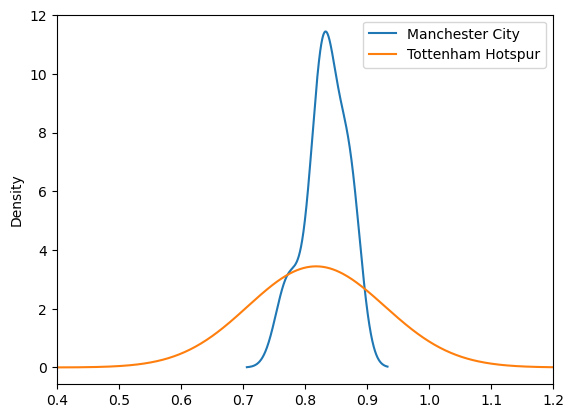

In [73]:
def get_distribution(pos_df,feature, club_1, club_2):
    essential_features = pd.DataFrame()
    
    # Get Club_1 dataframe
    all_features = pos_df[pos_df["Club"] == club_1]
    # select top-20 by Ovr_pot
    all_features = all_features.sort_values('Ovr_pot',ascending = False).head(20)
    all_features = all_features.reset_index(drop = True)
    
    # Isolate the required feature
    essential_features[club_1] = all_features[feature]
    
    # same for Club_2
    all_features = pos_df[pos_df["Club"] == club_2]
    all_features = all_features.sort_values('Ovr_pot',ascending = False).head(20)
    all_features = all_features.reset_index(drop = True)
    essential_features[club_2] = all_features[feature]
    
    # Plot
    #print(essential_features)
    essential_features[club_1].plot(kind='kde', xlim=(0.4,1.2))
    essential_features[club_2].plot(kind='kde', xlim=(0.4,1.2))
    
get_distribution(centrebacks_df, "Composure", "Manchester City", "Tottenham Hotspur")
plt.legend()

# Weighted mean of Club


According to the player's overall rating give them weights and come up with a weighted average for each position in the club.


In [74]:
def get_cur_pos_philosophy(cur_season_df, club , pos_list,pos_essential_ft):# pos list will be ["LW","RW"] for WING
    # extract players from the club and position
    club_df = cur_season_df[cur_season_df["Club"]==club]
    pos_df=club_df[club_df['Best Position'].isin(pos_list)]
    essential_df = pos_df[pos_essential_ft]
    cur_players = np.array(essential_df)
    
    denom=0
    num = np.zeros(shape = (cur_players.shape[1]))
    
    for i in range(cur_players.shape[0]):
        overall_rating = pos_df.iloc[i]["Ovr_pot"]
        
        # weights
        if(overall_rating >= 85):
            w = 20
        elif (overall_rating >= 80):
            w = 16
        elif(overall_rating >= 75):
            w = 8
        elif(overall_rating >= 70):
            w = 4
        else:
            w = 1
        denom+=w
        num+=w * cur_players[i]
        # print(num)
        
    return num/denom


In [75]:
get_cur_pos_philosophy(F_std_df,"Manchester City", ["CB"],Def_essential_ft)

array([0.77608696, 0.72588706, 0.69046443, 0.69182991, 0.67481884,
       0.77058279, 0.77940503, 0.72859704, 0.83301481, 0.79610984])

# Spider-Plots

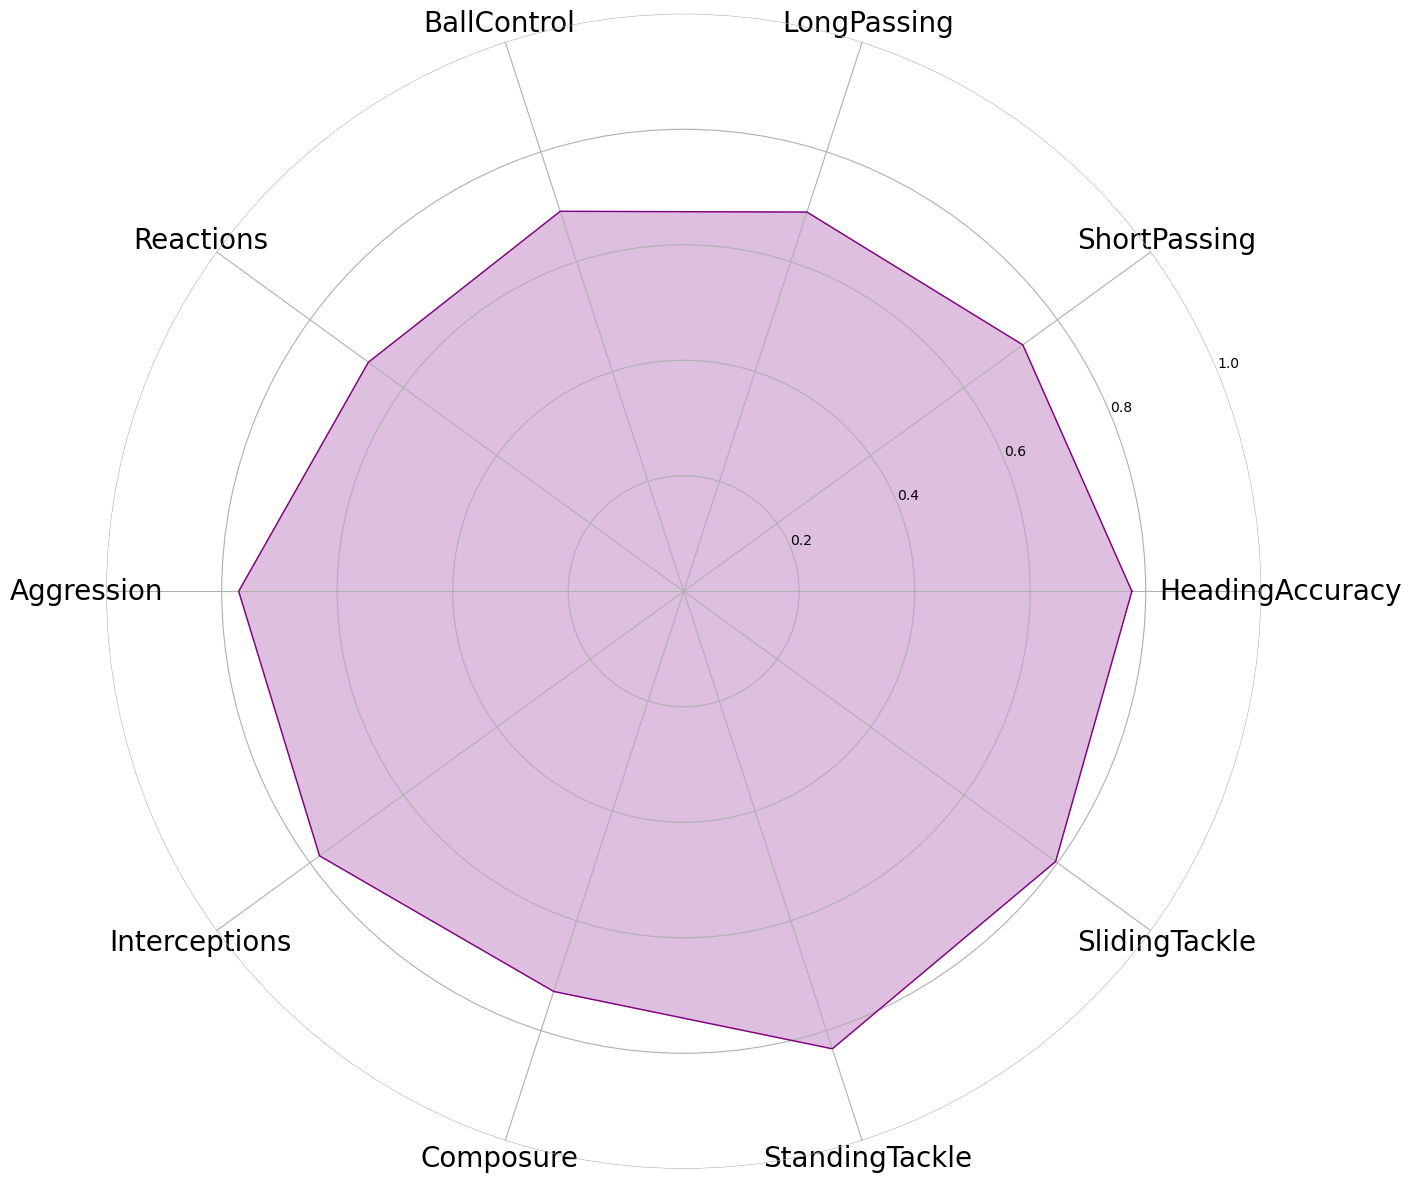

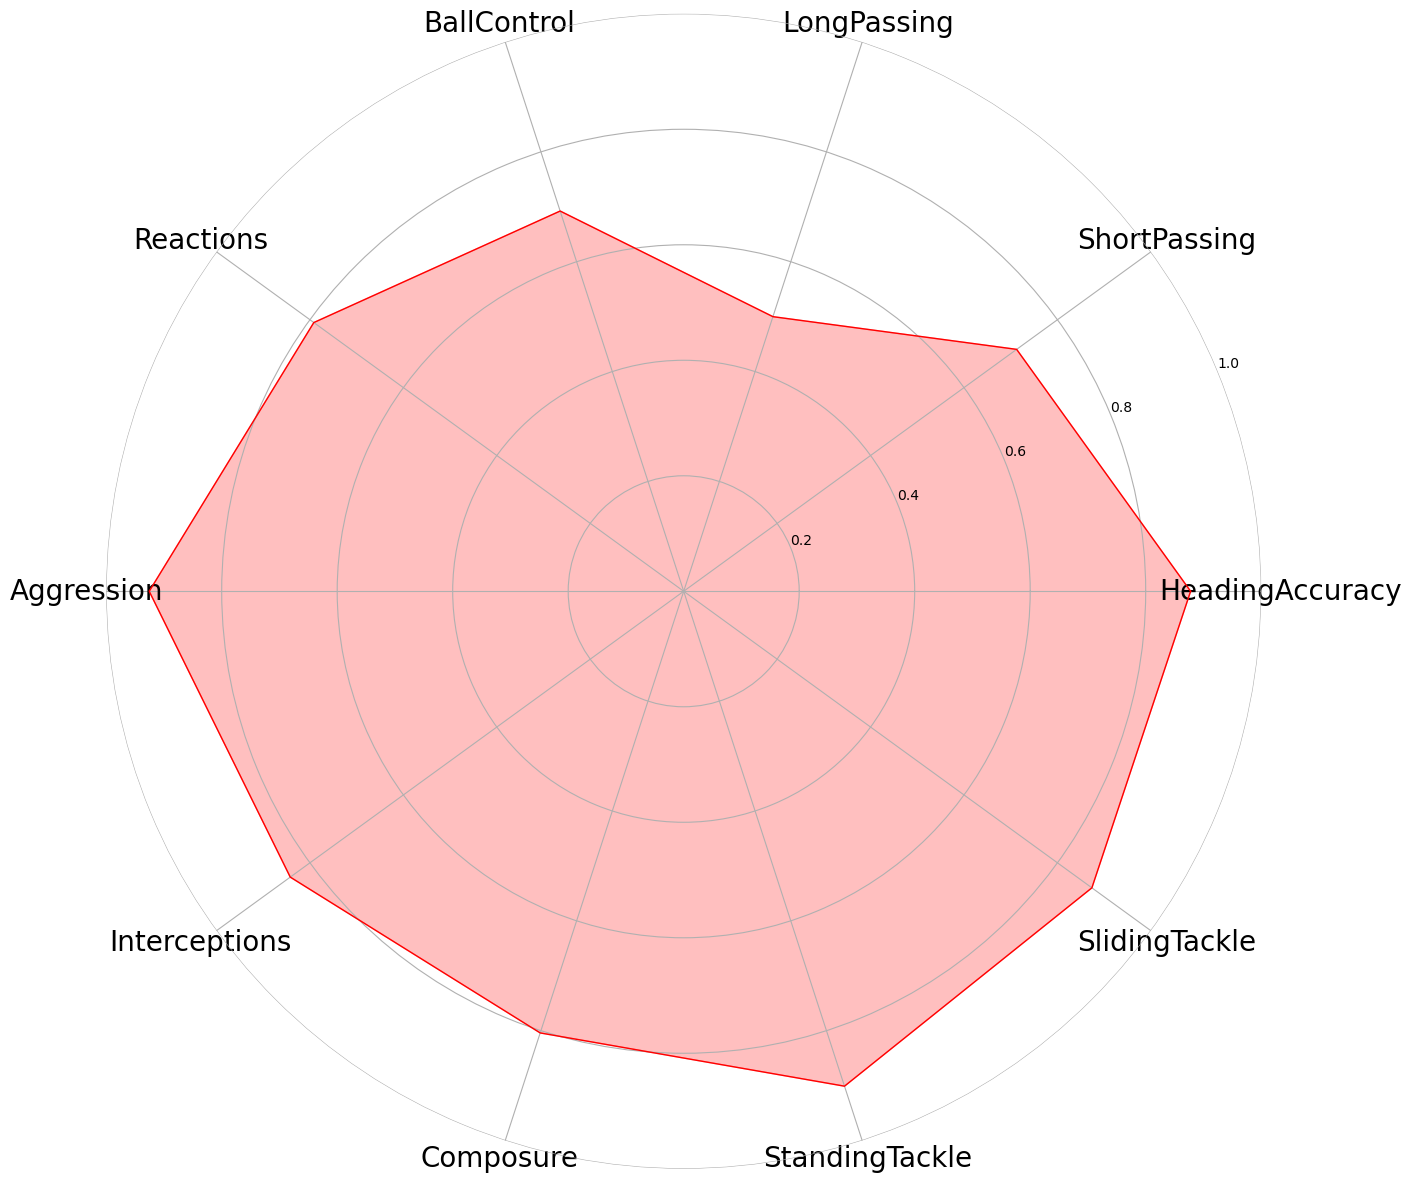

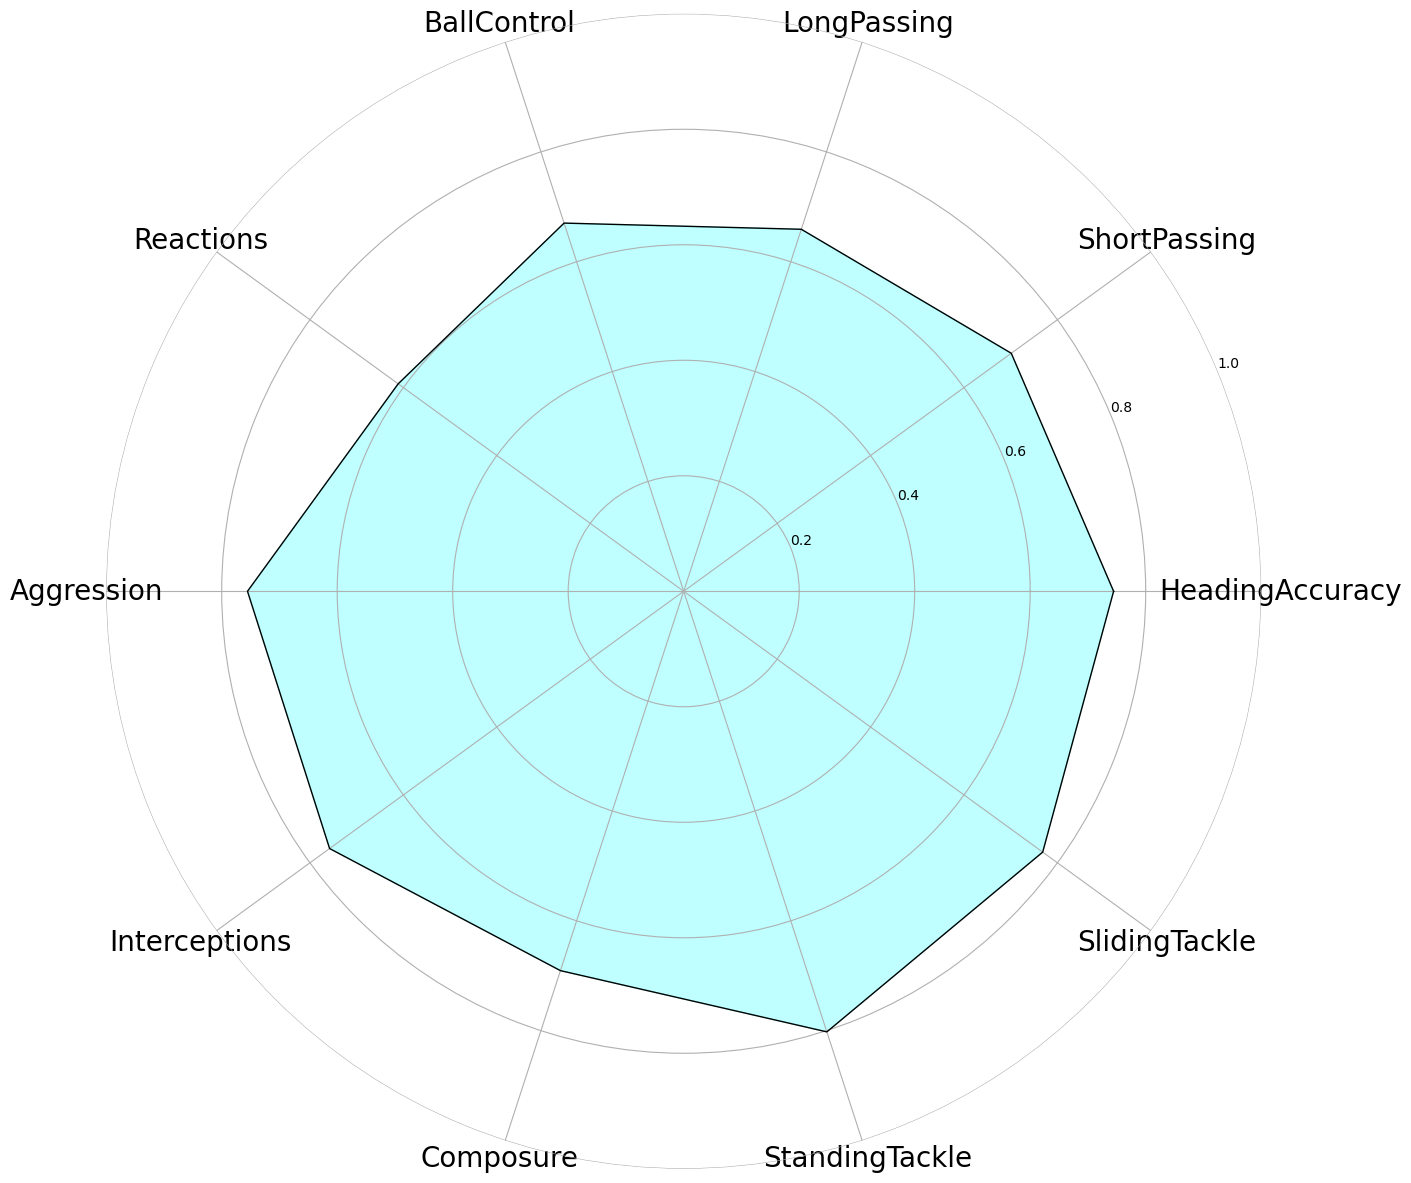

In [76]:
import numpy as np
import matplotlib.pyplot as plt

def create_spider_plot(features, values, color, color2):
    angles = np.linspace(0, 2*np.pi, len(features), endpoint=False).tolist()
    values += values[:1]  # Close the plot
    angles += angles[:1]  # Close the plot
    fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(polar=True))
    ax.plot(angles, values, linewidth=1, linestyle='solid', color=color2)
    ax.fill(angles, values, alpha=0.25, color=color)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features, fontsize=20)
    ax.yaxis.grid(True)
    ax.spines['polar'].set_visible(False)
    ax.set_ylim([0, 1])  # Set the maximum circle to 1

# features
features = ['HeadingAccuracy',
 'ShortPassing',
 'LongPassing',
 'BallControl',
 'Reactions',
 'Aggression',
 'Interceptions',
 'Composure',
 'StandingTackle',
 'SlidingTackle']

#club
values_1 = [0.77608696, 0.72588706, 0.69046443, 0.69182991, 0.67481884, 0.77058279, 0.77940503, 0.72859704, 0.83301481, 0.79610984]

#c. romero
values_2 = [0.87777778, 0.71264368, 0.5       , 0.69230769, 0.79166667,0.92553191, 0.84210526, 0.80412371, 0.9010989 , 0.87368421]

#B.Davies
values_3 = [0.74444444, 0.70114943, 0.65909091, 0.67032967, 0.61111111,0.75531915, 0.75789474, 0.69072165, 0.8021978 , 0.76842105]

create_spider_plot(features, values_1, "purple", "purple")
create_spider_plot(features, values_2, "red", "red")
create_spider_plot(features, values_3, "aqua", "black")
plt.show()

# Position similarity of a new player

similarity through weighted PCC

In [77]:
from numpy import inf
from sklearn.preprocessing import normalize
def club_pos_sim(new_player,pos_essential_features,pos_weights_per_club, means, club_cur = None):
    # extract the player data and normalise player vector
    new_player = np.array(new_player[pos_essential_features])
    new_player.shape = [new_player.shape[0],1]
    new_player = normalize(new_player, axis = 0)
    new_player.shape = [new_player.shape[0],]
    
    # Use given club vector or extract own and normalise it
    #club_cur  = get_cur_pos_philosophy(F_std_df,club,pos_list,pos_essential_features)
    club_cur.shape = [club_cur.shape[0],1]
    club_cur = normalize(club_cur, axis = 0)
    club_cur.shape = [club_cur.shape[0],]
    
    # Find weighted pcc
    weighted_dot = np.sum(pos_weights_per_club * (new_player-means) * (club_cur-means))
    mag_1 = np.sqrt(np.dot(pos_weights_per_club, np.square(new_player - means)))
    mag_2 = np.sqrt(np.dot(pos_weights_per_club, np.square(club_cur - means)))
    pos_sim = weighted_dot/(mag_1 * mag_2)

    return pos_sim



In [78]:
# Strength
def club_pos_mag(new_player,pos_essential_features,pos_weights_per_club):

    new_player = np.array(new_player[pos_essential_features])
    mag_1 = np.sqrt(np.dot(pos_weights_per_club, np.square(new_player))/np.sum(pos_weights_per_club))

    return mag_1


# Recommendation based on Similarity and Strength

In [79]:
def get_player_recs(df,club,pos_list, pos_essential_features,pos_weights_per_club,lambda1 = 0.6,lambda2 = 0.5, age_min = 21, age_max = 35, val = 500):
    # extract players in that position in all clubs
    pos_df=df[df['Best Position'].isin(pos_list)]
    essential_df = pos_df[pos_essential_features]
    
    d={}
    player_list = []
    min_sim = inf
    max_sim = -inf
    min_mag = inf
    max_mag = -inf
    
    # Find mean vector for doing PCC
    pos_np = essential_df.to_numpy()
    pos_np = normalize(pos_np)
    means = np.mean(pos_np, axis = 0)
    
    # Find club mean vector
    club_cur  = get_cur_pos_philosophy(F_std_df,club,pos_list,pos_essential_features)
    
    # Iterate over all prospective players
    for i in range(pos_df.shape[0]):
        new_player = pos_df.iloc[i]
        # similarity
        pos_sim = club_pos_sim(new_player,pos_essential_features,pos_weights_per_club[club], means, club_cur = club_cur)
        if(min_sim > pos_sim): min_sim = pos_sim
        if(max_sim < pos_sim): max_sim = pos_sim
        
        #strength
        pos_mag = club_pos_mag(new_player,pos_essential_features,pos_weights_per_club[club])
        if(min_mag > pos_mag): min_mag = pos_mag
        if(max_mag < pos_mag): max_mag = pos_mag
        
        # store
        d[str(new_player["ID"])] = [pos_sim, pos_mag]
        player_list.append(new_player["ID"])
    
    
    d_final = {}
    
    # iterate over all players again to min-max scale the stored sim and str values
    for id in player_list:
        d[str(id)] = [(d[str(id)][0] - min_sim)/(max_sim - min_sim), (d[str(id)][1] - min_mag)/(max_mag - min_mag)]
        # find rating
        d_final[str(id)] = lambda1*d[str(id)][0] + lambda2*d[str(id)][1]
    
    # sort by rating
    player_list.sort(key = lambda x: d_final[str(x)],reverse = True)
    
    # get sorted list with player data and filter out according to age and valuation
    new_list = [[df[df["ID"] == j]["Name"].values[0],j, d[str(j)]] for j in player_list[:] if ((float(df_22[df_22["ID"] == j]["Age"]) >= age_min) and (float(df_22[df_22["ID"] == j]["Age"]) <= age_max) and (float(df[df["ID"] == j]["Value"]) <= val) and ((df[df["ID"] == j]["Club"].values[0] != club)))]
    
    return new_list

In [80]:
# For striker: ["ST"]
# For Midefielder: ["CM", "LM", "RM", "CDM"] ...
get_player_recs(df_22_std,"Tottenham Hotspur",["ST"],ST_essential_ft,striker_weights_per_club, age_min = 22, age_max = 26, val = 50)

[['M. Gómez', 239207, [0.9242453840150886, 0.820719694359308]],
 ['N. Maupay', 211784, [0.9368354732048346, 0.7825824956909261]],
 ['R. Yaremchuk', 240702, [0.9359979118490309, 0.7635325112015197]],
 ['V. Osimhen', 232293, [0.8909107948341948, 0.7865987757465208]],
 ['R. Borré', 220883, [0.878580044177516, 0.7898952286718613]],
 ['M. Dembélé', 211591, [0.8772681444854958, 0.7856938946108856]],
 ['A. Sørloth', 216549, [0.9098374651214804, 0.7380921170652495]],
 ['K. Kodro', 211068, [0.9609411302517428, 0.6696659864005603]],
 ['A. Mitrović', 215716, [0.8699678552560502, 0.7647437162925655]],
 ['T. Abraham', 231352, [0.8286519961255321, 0.8038809687435775]],
 ['F. Viñas', 253385, [0.9100162257530804, 0.7035478682426548]],
 ['K. Nisbet', 225317, [0.9238208915226429, 0.6717783427434005]],
 ['K. Świderski', 224301, [0.8926073039868108, 0.7011829213765017]],
 ['C. Dessers', 222262, [0.8942114445954535, 0.680897777073084]],
 ['N. Orsini', 220148, [0.8905717013042068, 0.682491063838591]],
 ['P.

In [81]:
get_player_recs(df_22_std,"Manchester City",["ST"],ST_essential_ft,striker_weights_per_club, age_min = 18, age_max = 22, val = 140)

[['E. Haaland', 239085, [0.9275475973426599, 0.8700104635193219]],
 ['D. Malen', 231447, [0.9367623369496049, 0.7282788506231876]],
 ['M. Boadu', 239956, [0.973228936578886, 0.6472646846491193]],
 ['P. Daka', 241202, [0.9272310066825307, 0.683894803555769]],
 ['Dani Gómez', 243315, [0.96041305312751, 0.6405107891166786]],
 ['L. Nmecha', 230084, [0.9577218784717827, 0.6407430425601082]],
 ['F. Krüger', 245228, [0.9954212724565916, 0.5924011967434308]],
 ['J. Sargent', 242075, [0.957777145270226, 0.6349359323024115]],
 ['I. Ganago', 241130, [0.9294416272377006, 0.6538934588456057]],
 ['A. Isak', 233731, [0.7801445470569355, 0.8287647782564747]],
 ['S. Koita', 246762, [0.9268435805586637, 0.6351093201963464]],
 ['Abel Ruiz', 239250, [0.8997123994712966, 0.6615435643607932]],
 ['A. Hložek', 246618, [0.846810883610264, 0.7210783300812258]],
 ['Leandro Vivenço', 230519, [0.8643305517864042, 0.6975689280561491]],
 ['J. Burkardt', 244257, [0.9377464555199339, 0.6052605016694375]],
 ['B. Breret